In [15]:
import keras
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
# Reshaping 
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Normalization
x_train = x_train / 255
x_test = x_test / 255

# One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Modelado

## Utilizando las activaciones que usamos siempre

In [19]:
#LeNet Model Architecture

model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))




model.compile(loss=keras.metrics.categorical_crossentropy, 
              optimizer=keras.optimizers.Adam(), 
              metrics=['accuracy'])



In [20]:
history = model.fit(x_train, y_train, batch_size=128, epochs=7, verbose=1, validation_data=(x_test, y_test))

Epoch 1/7
469/469 [==============================] - 23s 49ms/step - loss: 0.3167 - accuracy: 0.9031 - val_loss: 0.0953 - val_accuracy: 0.9703
Epoch 2/7
469/469 [==============================] - 23s 48ms/step - loss: 0.0890 - accuracy: 0.9730 - val_loss: 0.0732 - val_accuracy: 0.9762
Epoch 3/7
469/469 [==============================] - 23s 48ms/step - loss: 0.0641 - accuracy: 0.9795 - val_loss: 0.0539 - val_accuracy: 0.9828
Epoch 4/7
469/469 [==============================] - 23s 49ms/step - loss: 0.0506 - accuracy: 0.9844 - val_loss: 0.0414 - val_accuracy: 0.9870
Epoch 5/7
469/469 [==============================] - 23s 49ms/step - loss: 0.0439 - accuracy: 0.9853 - val_loss: 0.0525 - val_accuracy: 0.9833
Epoch 6/7
469/469 [==============================] - 23s 49ms/step - loss: 0.0357 - accuracy: 0.9886 - val_loss: 0.0418 - val_accuracy: 0.9862
Epoch 7/7
469/469 [==============================] - 23s 49ms/step - loss: 0.0326 - accuracy: 0.9900 - val_loss: 0.0400 - val_accuracy: 0.9871

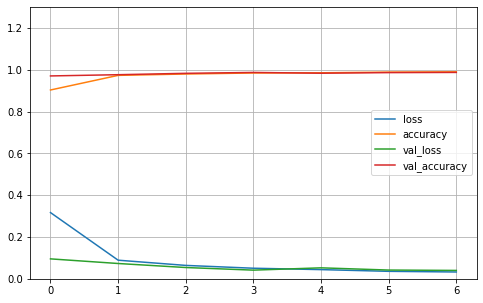

In [21]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.3)
plt.show()

## Probando las activaciones del paper

In [10]:
#LeNet Model Architecture

model2 = Sequential()
model2.add(Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(16, kernel_size=(5, 5), activation='tanh'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(120, activation='relu'))
model2.add(Dense(84, activation='relu'))
model2.add(Dense(10, activation='softmax'))




model2.compile(loss=keras.metrics.categorical_crossentropy, 
              optimizer=keras.optimizers.Adam(), 
              metrics=['accuracy'])

In [11]:
history2 = model2.fit(x_train, y_train, batch_size=128, epochs=7, verbose=1, validation_data=(x_test, y_test))

Epoch 1/7
469/469 [==============================] - 23s 49ms/step - loss: 0.3257 - accuracy: 0.9076 - val_loss: 0.0941 - val_accuracy: 0.9726
Epoch 2/7
469/469 [==============================] - 23s 49ms/step - loss: 0.0877 - accuracy: 0.9737 - val_loss: 0.0631 - val_accuracy: 0.9803
Epoch 3/7
469/469 [==============================] - 23s 49ms/step - loss: 0.0594 - accuracy: 0.9823 - val_loss: 0.0514 - val_accuracy: 0.9836
Epoch 4/7
469/469 [==============================] - 23s 50ms/step - loss: 0.0443 - accuracy: 0.9858 - val_loss: 0.0399 - val_accuracy: 0.9869
Epoch 5/7
469/469 [==============================] - 23s 49ms/step - loss: 0.0355 - accuracy: 0.9887 - val_loss: 0.0368 - val_accuracy: 0.9883
Epoch 6/7
469/469 [==============================] - 23s 49ms/step - loss: 0.0305 - accuracy: 0.9903 - val_loss: 0.0457 - val_accuracy: 0.9856
Epoch 7/7
469/469 [==============================] - 23s 49ms/step - loss: 0.0242 - accuracy: 0.9922 - val_loss: 0.0361 - val_accuracy: 0.9879

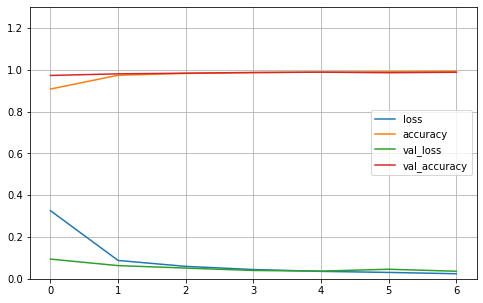

In [18]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.3)
plt.show()